### [python] 웹캠 영상에서 검출된 얼굴들에 모자이크 효과 넣기

##### 링크: https://bskyvision.com/934

In [2]:
# import necessary packages
import cvlib as cv
import cv2
import pafy
# open webcam

url = 'https://www.youtube.com/watch?v=HRt50BPtZSQ'
video = pafy.new(url)
best = video.getbest(preftype='mp4')     # 'webm','3gp'
webcam=cv2.VideoCapture(best.url)


if not webcam.isOpened():
    print("Could not open webcam")
    exit()

# loop through frames
while webcam.isOpened():

    # read frame from webcam
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()

    # apply face detection
    face, confidence = cv.detect_face(frame)

    print(face)
    print(confidence)

    # loop through detected faces
    for idx, f in enumerate(face):

        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        # 모자이크 효과 주기: 얼굴 부분을 줄였다가 다시 원크기로 복구시키면 모자이크처럼 됨.
        face_region = frame[startY:endY, startX:endX]

        M = face_region.shape[0]
        N = face_region.shape[1]

        face_region = cv2.resize(face_region, None, fx=0.05, fy=0.06, interpolation=cv2.INTER_AREA)
        face_region = cv2.resize(face_region, (N, M), interpolation=cv2.INTER_AREA)
        frame[startY:endY, startX:endX] = face_region

    # display output
    cv2.imshow("Real-time face detection", frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release resources
webcam.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

### [ubuntu + python] 웹캠 영상 실시간 물체(객체) 검출

##### https://bskyvision.com/681

In [ ]:
# import necessary packages
import cvlib as cv
from cvlib.object_detection import draw_bbox
import cv2

# open webcam (웹캠 열기)
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print('Could not open webcam')
    exit()

# loop through frames
while webcam.isOpened():

    # read frame from webcam
    status, frame = webcam.read()

    if not status:
        break

    # apply object detection (물체 검출)
    bbox, label, conf = cv.detect_common_objects(frame)

    print(bbox, label, conf)

    # draw bounding box over detected objects (검출된 물체 가장자리에 바운딩 박스 그리기)
    out = draw_bbox(frame, bbox, label, conf, write_conf=True)

    # display output
    cv2.imshow('Real-time object detection', out)

    # press 'Q' to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release resources
webcam.release()
cv2.destroyAllWindows()

: 

### [ubuntu + python] 얼굴 검출

##### https://bskyvision.com/675

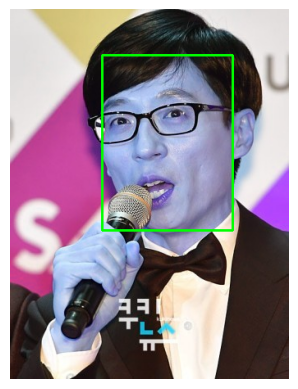

In [ ]:
# import libraries
import cv2
import matplotlib.pyplot as plt 
import cvlib as cv

image_path = 'kh.jpg'
im = cv2.imread(image_path)  # 이미지 읽기
# plt.imshow(im)
# plt.show()

# detect faces (얼굴 검출)
faces, confidences = cv.detect_face(im)

# loop through detected faces and add bounding box (검출된 얼굴을 박스로 감싸기)
for face in faces:
    (startX, startY) = face[0], face[1]
    (endX, endY) = face[2], face[3]
    # draw rectangle over face
    cv2.rectangle(im, (startX, startY), (endX, endY), (0,255,0), 2)

# display output
plt.imshow(im)
plt.axis('off')
plt.show()
# cv2.imwrite('result.jpg', im)  # 이미지 쓰기

### [ubuntu+python] 얼굴 검출 후 성별 인식

##### https://bskyvision.com/677

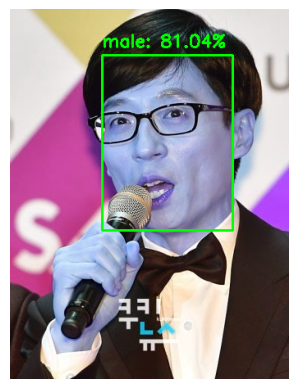

In [ ]:
# import libraries
import cv2
import cvlib as cv
import numpy as np

image_path = 'kh.jpg'
im = cv2.imread(image_path)  # 이미지 읽기


# detect faces (얼굴 검출)
faces, confidences = cv.detect_face(im)

for face in faces:
    (startX, startY) = face[0], face[1]
    (endX, endY) = face[2], face[3]
    # draw rectangel over face
    cv2.rectangle(im, (startX, startY), (endX, endY), (0,255,0), 2)  # 검출된 얼굴 위에 박스 그리기
    face_crop = np.copy(im[startY:endY, startX:endX])

    # gender detection (성별 검출)
    label, confidence = cv.detect_gender(face_crop)

    #print(confidence)
    #print(label)

    idx = np.argmax(confidence)
    label = label[idx]

    label = '{}: {:.2f}%'.format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(im, label, (startX, Y), cv2.FONT_HERSHEY_SIMPLEX,
    0.7, (0, 255, 0), 2)  # 박스 위에 남자인지 여자인지 라벨과 확률 쓰기

cv2.imwrite('result.jpg', im)  # 이미지 쓰기
plt.imshow(im)
plt.axis('off')
plt.show()

In [ ]:
!pip install youtube-dl

Defaulting to user installation because normal site-packages is not writeable


In [17]:
## 유튜브 opencv를 이용하여 사진에 얼굴만 모자이크 처리

import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# eye_casecade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

ff = np.fromfile('다운로드.jpg', np.uint8)
img = cv2.imdecode(ff, cv2.IMREAD_UNCHANGED)
img = cv2.resize(img, dsize=(0, 0), fx=1.0, fy=1.0, interpolation=cv2.INTER_LINEAR)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 찾는 코드
faces = face_cascade.detectMultiScale(gray, 1.2, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)

# # 눈 찾는 코드
    # roi_gray = gray[y:y+h, x:x+w]
    # roi_color = img[y:y+h, x:x+w]
    # eyes = eye_casecade.detectMultiScale(roi_gray)
    # for (ex, ey, ew, eh) in eyes:
        # cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)


# 얼굴 모자이크 코드
# for (x,y,w,h) in faces:
#     face_img = img[y:y+h, x:x+w]
#     face_img = cv2.resize(face_img, dsize=(0,0), fx=0.07, fy=0.07)
#     face_img = cv2.resize(face_img, (w,h), interpolation=cv2.INTER_AREA)
#     img[y:y+h, x:x+h] = face_img  

cv2.imshow('face find', img)
cv2.waitKey(0)
cv2.destroyAllWindows()